In [ ]:
#title loading_model_EAST

import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/argman/EAST.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q $git_repo_url
  #!cd $project_name && pip install -q -r requirements.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
#title unzipping the model_weights
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  

pretrained_model = 'east_icdar2015_resnet_v1_50_rbox'
if not exists(pretrained_model):
  # download the pretrained model
  pretrained_model_file_name = 'east_icdar2015_resnet_v1_50_rbox.zip'
  download_from_google_drive('0B3APw5BZJ67ETHNPaU9xUkVoV0U', pretrained_model_file_name)
  !unzip $pretrained_model_file_name

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   383    0   383    0     0    943      0 --:--:-- --:--:-- --:--:--   943
100  346M    0  346M    0     0  49.8M      0 --:--:--  0:00:06 --:--:-- 64.4M
Archive:  east_icdar2015_resnet_v1_50_rbox.zip
  inflating: east_icdar2015_resnet_v1_50_rbox/checkpoint  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.data-00000-of-00001  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.index  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.meta  


In [ ]:
#title Drive_mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#title webcam_function
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


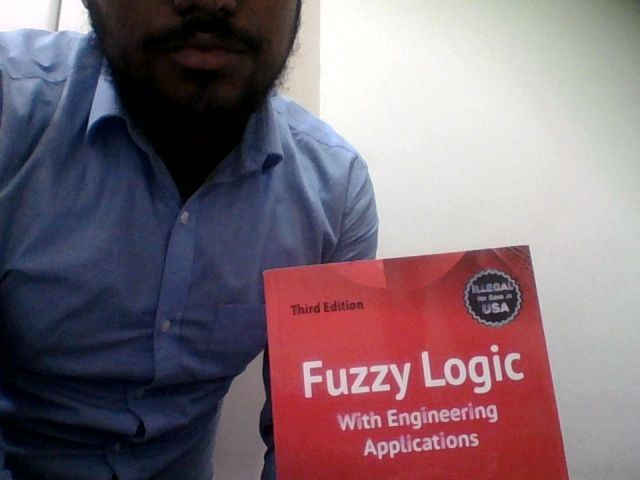

In [ ]:
#title webcam_capture
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
#title plotting_the_image
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/WhatsApp Image 2019-11-27 at 15.59.46.jpeg',cv2.IMREAD_COLOR)
orig = img.copy()

In [ ]:
from google.colab.patches import cv2_imshow

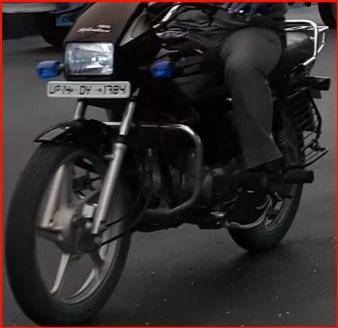

In [ ]:
#title image_plot
cv2_imshow(orig)

In [ ]:
#title optional_cell
!mkdir bike_image


In [ ]:
#title EAST_Model_inference
download_dir= '/content/bike_image'
!cd $project_name && python eval.py --test_data_path=$download_dir --gpu_list=0 --checkpoint_path=../$pretrained_model/ --output_dir=...

make: Entering directory '/content/EAST/lanms'
make: 'adaptor.so' is up to date.
make: Leaving directory '/content/EAST/lanms'
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W1127 10:35:59.482853 140402795128704 module_wrapper.py:139] From eval.py:136: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.


W1127 10:35:59.483641 140402795128704 module_wrapper.py:139] From eval.py:137: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W1127 10:35:59.485687 140402795128704 module_wrapper.py:139] From eval.py:138: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.


In [ ]:
#title utility
from os import listdir
def list_files1(directory, extension):
    return (f for f in listdir(directory) if f.endswith('.' + extension))

In [ ]:
#title plotting_detected_image
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/webcam_images/output/photo.jpg',cv2.IMREAD_COLOR)
cv2_imshow(img)

In [ ]:
#title bounding_box_extraction
from google.colab.patches import cv2_imshow
bboxes = []
with open('/content/webcam_images/output/photo.txt','r') as f:
  lines = f.readlines()
  for line in lines:
    line = line.strip('\n')
    coord = line.split(',')
    startY = min(coord[1],coord[3],coord[5],coord[7])
    endY = max(coord[1],coord[3],coord[5],coord[7])
    startX = min(coord[0],coord[2],coord[4],coord[6])
    endX = max(coord[0],coord[2],coord[4],coord[6])
    bboxes.append((startY,endY, startX,endX))

len(bboxes)


7

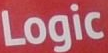

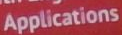

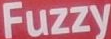

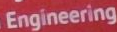

In [ ]:
#title plotting_extracted_text
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

for i,box in enumerate(bboxes):
  y1,y2,x1,x2 = box
  data  =orig[int(y1):int(y2), int(x1):int(x2)]
  cv2_imshow(data)
  print('\t')
  

  

In [ ]:
#title saving_detected_image
import sys
from PIL import Image
for i,box in enumerate(bboxes):
  y1,y2,x1,x2 = box
  data = orig[int(y1):int(y2), int(x1):int(x2)]
  new_im = Image.fromarray(data)
  new_im.save('img'+str(i)+'.png')



In [ ]:
#title loading_CRNN
!git clone https://github.com/MaybeShewill-CV/CRNN_Tensorflow.git

Cloning into 'CRNN_Tensorflow'...
remote: Enumerating objects: 1212, done.
remote: Total 1212 (delta 0), reused 0 (delta 0), pack-reused 1212
Receiving objects: 100% (1212/1212), 526.37 MiB | 14.16 MiB/s, done.
Resolving deltas: 100% (667/667), done.


In [ ]:
#title
%cd CRNN_Tensorflow/

/content/CRNN_Tensorflow


In [ ]:
#title 
!pip install -r requirements.txt

In [ ]:
#title 
%cd CRNN_Tensorflow/


In [ ]:
!pip install tensorflow==1.12

In [ ]:
#title weights
!unzip /content/drive/'My Drive'/model.zip 

In [ ]:
#title CRNN_Model_inference
!python /content/CRNN_Tensorflow/tools/test_shadownet.py --image_path /content/img2.png --weights_path /content/CRNN_Tensorflow/model/shadownet.ckpt --char_dict_path /content/CRNN_Tensorflow/data/char_dict/char_dict_en.json --ord_map_dict_path /content/CRNN_Tensorflow/data/char_dict/ord_map_en.json


In [ ]:
!python /content/CRNN_Tensorflow/tools/test_shadownet.py --image_path /content/img0.png --weights_path /content/CRNN_Tensorflow/model/shadownet.ckpt --char_dict_path /content/CRNN_Tensorflow/data/char_dict/char_dict_en.json --ord_map_dict_path /content/CRNN_Tensorflow/data/char_dict/ord_map_en.json


In [ ]:
!python /content/CRNN_Tensorflow/tools/test_shadownet.py --image_path /content/img1.png --weights_path /content/CRNN_Tensorflow/model/shadownet.ckpt --char_dict_path /content/CRNN_Tensorflow/data/char_dict/char_dict_en.json --ord_map_dict_path /content/CRNN_Tensorflow/data/char_dict/ord_map_en.json


**TransLiteration File**

In [ ]:
!pip install import-ipynb
import import_ipynb
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.


  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2975 sha256=f0245226a1c7df3789a739c8fd3a788599a5e53a66f0164cfcc9fa09bbcb50ca
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [ ]:
# Copy the link and remove the front part of the link (i.e. https://drive.google.com/open?id=) to get the file ID.
your_module = drive.CreateFile({'id':'17iOj9YwfKcvtTb0cwcGBg4tc6gyoE-hT'})
your_module.GetContentFile('Transliteration(1).ipynb')
import Transliteration

In [ ]:
from Transliteration import translitrate

Input: prateek
Predicted translation: परतीक


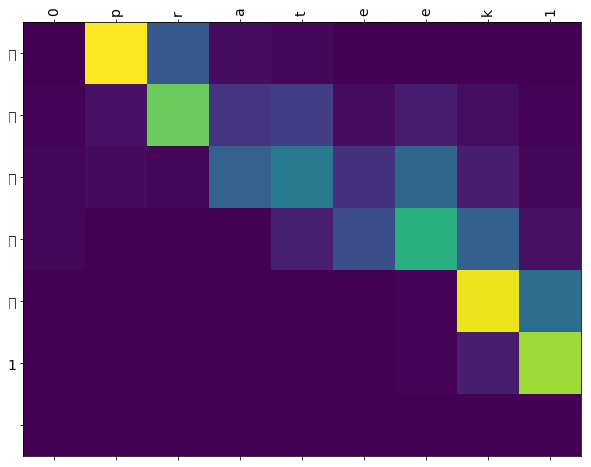

In [ ]:
translitrate('prateek')